In [246]:
import numpy as np
import pandas as pd

d = pd.read_csv("初赛/train/train.csv")
print(d)
d.info()

             time     年  月   日  小时  分钟   秒  温度(室外)  湿度(室外)  气压(室外)  湿度(室内)  \
0      1552496443  2019  3  14   1   0  43    14.6    85.0   993.1    80.0   
1      1552496503  2019  3  14   1   1  43    14.7    84.0   993.0    80.0   
2      1552496565  2019  3  14   1   2  45    14.7    84.0   992.7    80.0   
3      1552496624  2019  3  14   1   3  44    14.6    85.0   993.2    80.0   
4      1552496682  2019  3  14   1   4  42    14.6    85.0   992.7    80.0   
...           ...   ... ..  ..  ..  ..  ..     ...     ...     ...     ...   
25492  1554224151  2019  4   3   0  55  51    17.3    78.0   983.8    75.0   
25493  1554224212  2019  4   3   0  56  52    17.3    77.0   983.4    75.0   
25494  1554224272  2019  4   3   0  57  52    17.3    77.0   983.1    75.0   
25495  1554224332  2019  4   3   0  58  52    17.3    77.0   983.3    75.0   
25496  1554224391  2019  4   3   0  59  51    17.2    77.0   982.9    75.0   

       气压(室内)  temperature  
0       992.4         15.4  
1    

In [247]:
d["time"] = pd.to_datetime(d["time"], origin='1970-01-01 08:00:00', unit="s")
d.set_index("time")
# d.fillna(method="ffill", inplace=True)

,年,月,日,小时,分钟,秒,温度(室外),湿度(室外),气压(室外),湿度(室内),气压(室内),temperature
time,,,,,,,,,,,,
2019-03-14 01:00:43,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4
2019-03-14 01:01:43,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4
2019-03-14 01:02:45,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4
2019-03-14 01:03:44,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4
2019-03-14 01:04:42,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-03 00:55:51,2019,4,3,0,55,51,17.3,78.0,983.8,75.0,982.2,17.4
2019-04-03 00:56:52,2019,4,3,0,56,52,17.3,77.0,983.4,75.0,982.5,17.4
2019-04-03 00:57:52,2019,4,3,0,57,52,17.3,77.0,983.1,75.0,982.2,17.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25497 entries, 0 to 25496
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         25497 non-null  datetime64[ns]
 1   年            25497 non-null  int64         
 2   月            25497 non-null  int64         
 3   日            25497 non-null  int64         
 4   小时           25497 non-null  int64         
 5   分钟           25497 non-null  int64         
 6   秒            25497 non-null  int64         
 7   温度(室外)       24837 non-null  float64       
 8   湿度(室外)       24837 non-null  float64       
 9   气压(室外)       24837 non-null  float64       
 10  湿度(室内)       24807 non-null  float64       
 11  气压(室内)       24807 non-null  float64       
 12  temperature  24807 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 2.5 MB


Text(0.5, 1.0, 'origin')

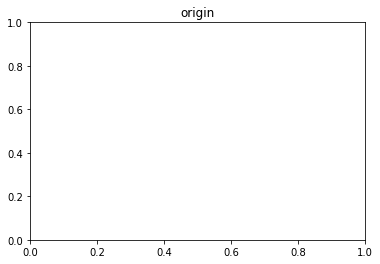

In [248]:
d.info()
from matplotlib import pyplot as plt

plt.title("origin")
# x=list(train_set["time"])
# y=list(train_set["temperature"])
# plt.plot(train_set["time"],train_set["temperature"])

In [249]:
print(f"Total unique dates in the dataset: {len(set(d['time']))}")
print(f"Number of rows in the dataset: {d.shape[0]}")

Total unique dates in the dataset: 25497
Number of rows in the dataset: 25497


In [250]:
features = ['temperature', '气压(室内)', '湿度(室内)']

In [251]:
# Aggregating to hourly level
d = d.groupby('time', as_index=False)[features].mean()

# Creating the data column
d['date'] = [x.date() for x in d['time']]

In [252]:
# Extracting the hour of day
d['hour'] = [x.hour for x in d['time']]

# Extracting the month of the year
d['month'] = [x.month for x in d['time']]
d

,time,temperature,气压(室内),湿度(室内),date,hour,month
0,2019-03-14 01:00:43,15.4,992.4,80.0,2019-03-14,1,3
1,2019-03-14 01:01:43,15.4,992.6,80.0,2019-03-14,1,3
2,2019-03-14 01:02:45,15.4,992.8,80.0,2019-03-14,1,3
3,2019-03-14 01:03:44,15.4,992.6,80.0,2019-03-14,1,3
4,2019-03-14 01:04:42,15.3,992.6,80.0,2019-03-14,1,3
...,...,...,...,...,...,...,...
25492,2019-04-03 00:55:51,17.4,982.2,75.0,2019-04-03,0,4
25493,2019-04-03 00:56:52,17.4,982.5,75.0,2019-04-03,0,4
25494,2019-04-03 00:57:52,17.4,982.2,75.0,2019-04-03,0,4
25495,2019-04-03 00:58:52,17.4,982.5,75.0,2019-04-03,0,4


In [253]:
d.loc[d["hour"]==12,["temperature","time"]]

,temperature,time
662,15.4,2019-03-14 12:00:38
663,15.4,2019-03-14 12:01:39
664,15.5,2019-03-14 12:02:39
665,15.5,2019-03-14 12:03:36
666,15.4,2019-03-14 12:04:38
...,...,...
23782,15.8,2019-04-01 12:55:20
23783,15.9,2019-04-01 12:56:20
23784,15.9,2019-04-01 12:57:20
23785,15.9,2019-04-01 12:58:20


In [254]:
for i in range(d.shape[0]):
    if d.loc[i,"hour"]==0 or d.loc[i,"hour"]==12:
        d.loc[i,"time"]=d.loc[i,"time"]-pd.Timedelta(hours=12)
d[features].describe()

,temperature,气压(室内),湿度(室内)
count,24807.000000,24807.000000,24807.000000
mean,16.629089,981.264248,72.601443
std,3.693474,43.900166,14.051747
min,9.300000,392.500000,25.000000
25%,13.800000,980.000000,64.000000
50%,16.100000,985.900000,76.000000
75%,18.400000,989.900000,84.000000
max,30.100000,1013.700000,91.000000


In [255]:
d.loc[d["hour"]==12,["temperature","time"]]

,temperature,time
662,15.4,2019-03-14 00:00:38
663,15.4,2019-03-14 00:01:39
664,15.5,2019-03-14 00:02:39
665,15.5,2019-03-14 00:03:36
666,15.4,2019-03-14 00:04:38
...,...,...
23782,15.8,2019-04-01 00:55:20
23783,15.9,2019-04-01 00:56:20
23784,15.9,2019-04-01 00:57:20
23785,15.9,2019-04-01 00:58:20


In [256]:
d.head(10)

,time,temperature,气压(室内),湿度(室内),date,hour,month
0,2019-03-14 01:00:43,15.4,992.4,80.0,2019-03-14,1,3
1,2019-03-14 01:01:43,15.4,992.6,80.0,2019-03-14,1,3
2,2019-03-14 01:02:45,15.4,992.8,80.0,2019-03-14,1,3
3,2019-03-14 01:03:44,15.4,992.6,80.0,2019-03-14,1,3
4,2019-03-14 01:04:42,15.3,992.6,80.0,2019-03-14,1,3
5,2019-03-14 01:05:45,15.3,992.9,80.0,2019-03-14,1,3
6,2019-03-14 01:06:44,15.3,409.6,80.0,2019-03-14,1,3
7,2019-03-14 01:07:42,15.3,992.8,80.0,2019-03-14,1,3
8,2019-03-14 01:08:45,15.3,993.2,80.0,2019-03-14,1,3
9,2019-03-14 01:09:42,15.3,993.2,80.0,2019-03-14,1,3


In [257]:
d[['time', 'temperature']].tail(10)

,time,temperature
25487,2019-04-02 12:50:51,17.4
25488,2019-04-02 12:51:51,17.5
25489,2019-04-02 12:52:51,17.5
25490,2019-04-02 12:53:51,17.5
25491,2019-04-02 12:54:51,17.5
25492,2019-04-02 12:55:51,17.4
25493,2019-04-02 12:56:52,17.4
25494,2019-04-02 12:57:52,17.4
25495,2019-04-02 12:58:52,17.4
25496,2019-04-02 12:59:51,17.4


In [258]:
# Extracting the hour of day
d['hour'] = [x.hour for x in d['time']]

# Extracting the month of the year
d['month'] = [x.month for x in d['time']]
d.sort_values("time",inplace=True)#排序
d.fillna(method="ffill", inplace=True)

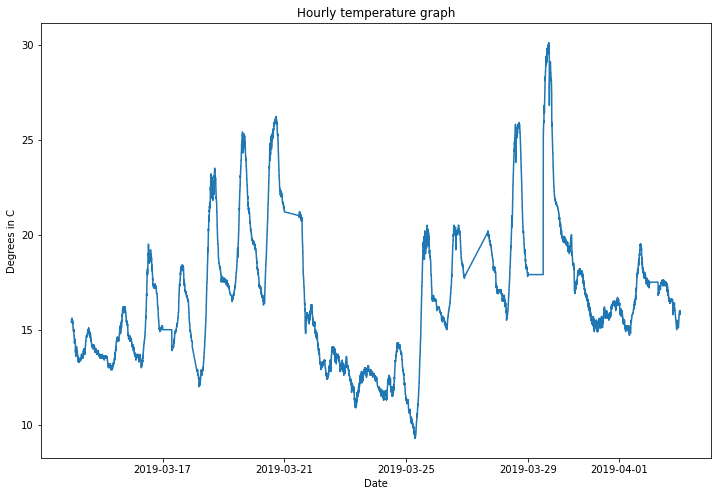

In [259]:
plt.figure(figsize=(12, 8))
plt.plot('time', 'temperature', data=d)
plt.title('Hourly temperature graph')
plt.ylabel('Degrees in C')
plt.xlabel('Date')
plt.show()

D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21387 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0,

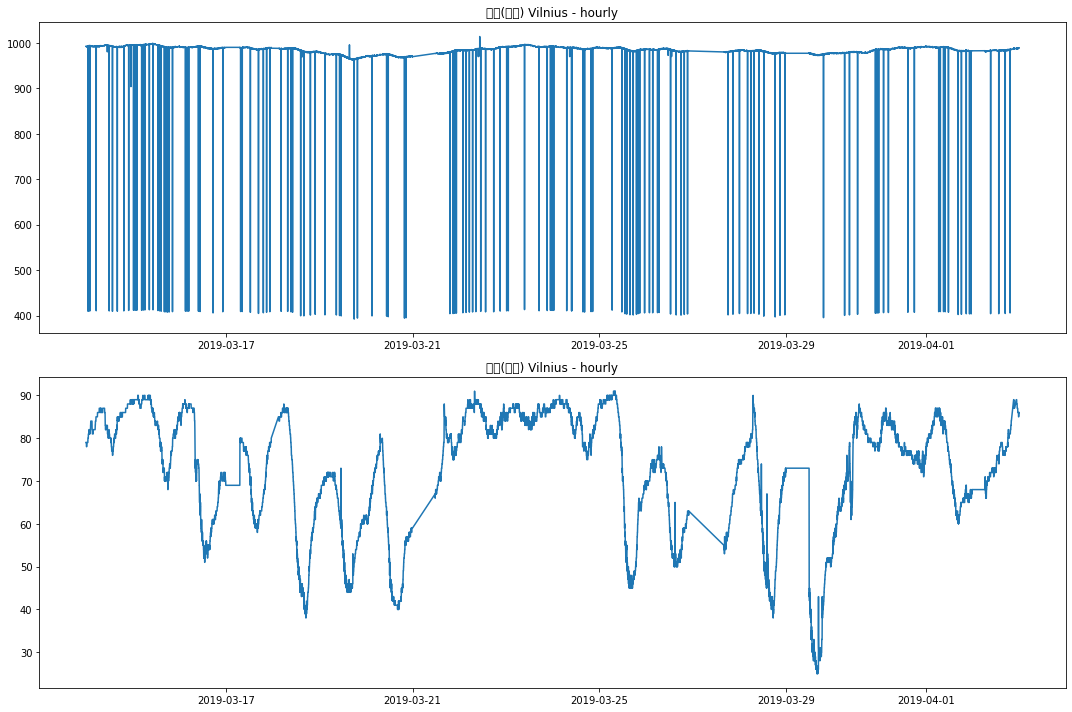

In [260]:
plot_features = d[features]
plot_features.index = d.time

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(15, 10),
    facecolor="w",
    edgecolor="k"
)

for i, feature in enumerate(['气压(室内)', '湿度(室内)']):
    axes[i % 2].plot(plot_features[feature])
    axes[i % 2].set_title(f'{feature} Vilnius - hourly')

plt.tight_layout()

plt.show()

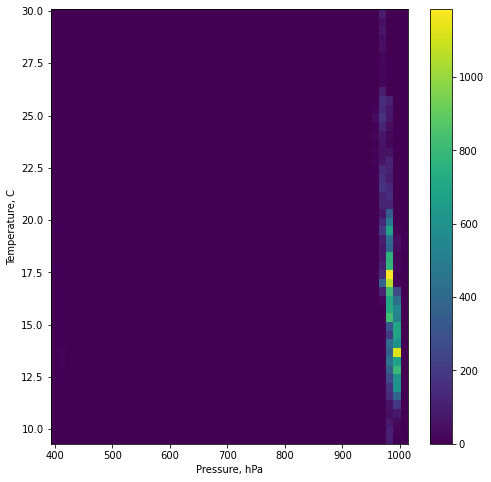

In [261]:
plt.figure(figsize=(8, 8))
plt.hist2d(d['气压(室内)'], d['temperature'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Pressure, hPa')
plt.ylabel('Temperature, C')
ax.axis('tight')
plt.show()

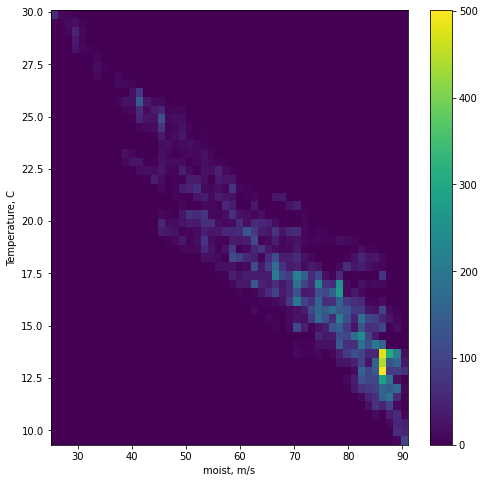

In [262]:
plt.figure(figsize=(8, 8))
plt.hist2d(d['湿度(室内)'], d['temperature'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('moist, m/s')
plt.ylabel('Temperature, C')
ax.axis('tight')
plt.show()

<AxesSubplot:title={'center':'temperature'}, xlabel='hour'>

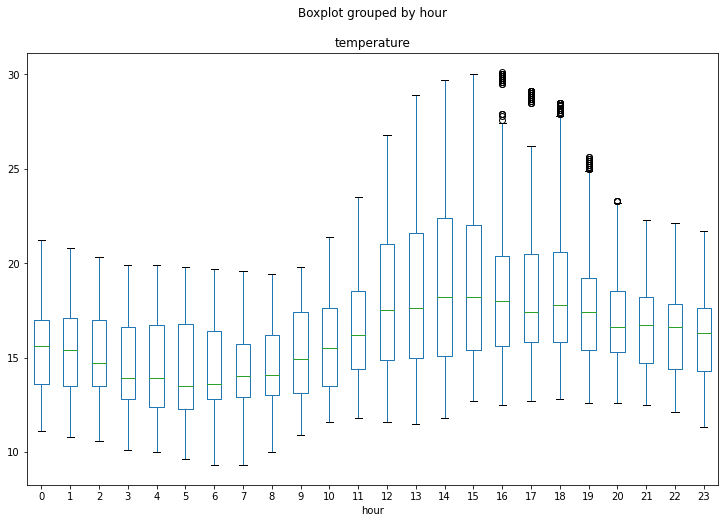

In [263]:
d.boxplot('temperature', by='hour', figsize=(12, 8), grid=False)

In [264]:
# Creating the cyclical daily feature
d['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in d['hour']]
d['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in d['hour']]

In [265]:
dsin = d[['time', 'temperature', 'hour', 'day_sin', 'day_cos']].head(25).copy()
dsin['day_sin'] = [round(x, 3) for x in dsin['day_sin']]
dsin['day_cos'] = [round(x, 3) for x in dsin['day_cos']]

dsin

,time,temperature,hour,day_sin,day_cos
662,2019-03-14 00:00:38,15.4,0,0.0,1.0
663,2019-03-14 00:01:39,15.4,0,0.0,1.0
664,2019-03-14 00:02:39,15.5,0,0.0,1.0
665,2019-03-14 00:03:36,15.5,0,0.0,1.0
666,2019-03-14 00:04:38,15.4,0,0.0,1.0
667,2019-03-14 00:05:39,15.5,0,0.0,1.0
668,2019-03-14 00:06:40,15.5,0,0.0,1.0
669,2019-03-14 00:07:40,15.5,0,0.0,1.0
670,2019-03-14 00:08:37,15.5,0,0.0,1.0
671,2019-03-14 00:09:38,15.5,0,0.0,1.0
